### 로지스틱 회귀로 와인 분류하기

In [20]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [21]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [22]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


통계 데이터의 결과: 각각 스케일이 다르다.

In [23]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


표준화를 위해 판다스 데이터프레임을 넘파이 배열로 변경하고, 훈련 세트와 테스트 세트로 나누기

In [24]:
data = wine[['alcohol', 'sugar','pH']].to_numpy()
target = wine['class'].to_numpy()

In [25]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [26]:
print(train_input.shape, test_input.shape) # 크기 확인

(5197, 3) (1300, 3)


In [27]:
from sklearn.preprocessing import StandardScaler # 정규화
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

### 로지스틱 회귀 모델 훈련
결과 값: 점수가 둘 다 낮은 걸 보니 과소적합된 것 같다.

In [28]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


로지스틱 회귀가 학습한 계수와 절편

In [29]:
print(lr.coef_, lr.intercept_)

[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


## 결정 트리
- 스무고개와 같이 질문을 하나씩 던져서 정답과 맞춰가는 방법

In [30]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target)) # 과대적합된 결과

0.996921300750433
0.8592307692307692


그림으로 출력해보기
- 노드: 훈련 데이터의 특성에 대한 테스트를 표현한다. 결정트리를 구성하는 핵심 요소
    - 가지(branch)는 테스트의 결과(T, F)를 나타내며 일반적으로 하나의 노드는 2개의 가지를 가진다.
> 맨 위의 노드: 루트 노드 / 맨 아래 노드: 리프 노드

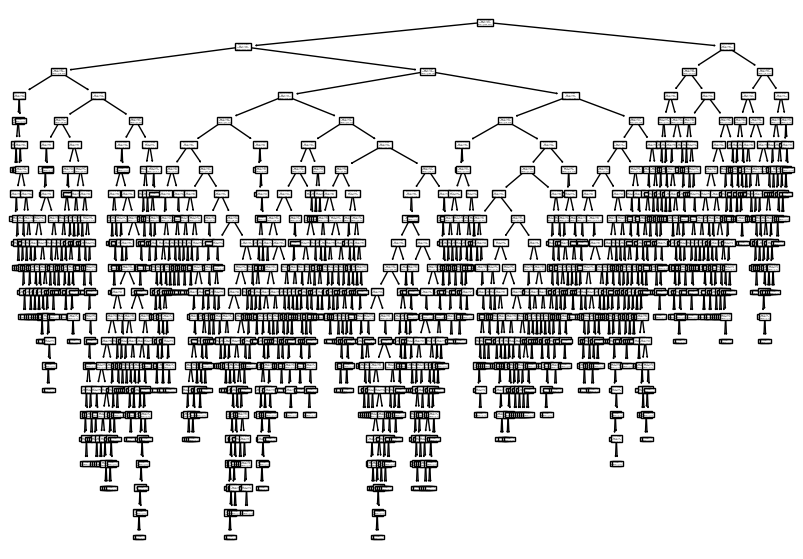

In [31]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

- max_depth 매개변수 1 : 루트 노드를 제외하고 하나의 노드를 확장하여 그린다.
- filled 매개변수 : 클래스에 맞게 노드의 색을 칠한다.
- feature_names 매개변수: 특성의 이름을 전달한다.

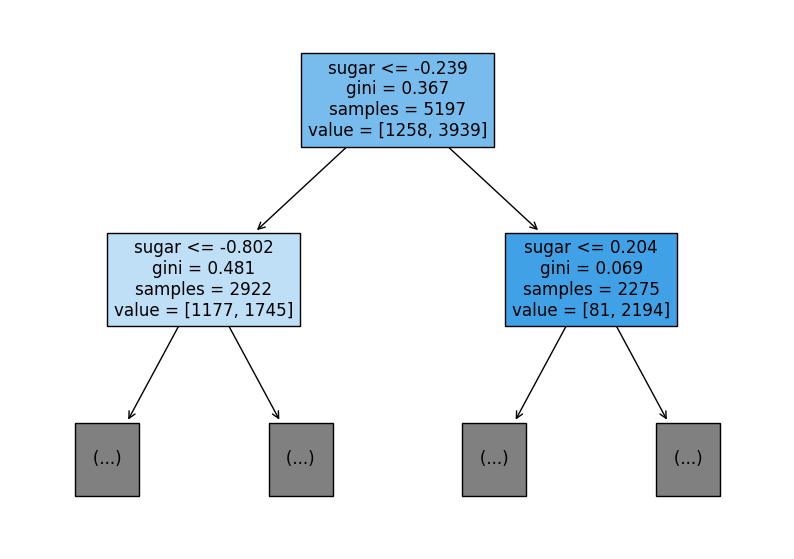

In [32]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

### 가지치기

In [33]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


결과 값: 당도가 -0.802 보다 크고 -0.239 보다 작은 와인 중에 알코올 도수가 0.454와 같거나 작은 것이 레드와인
- 데이터가 전처리 되어서 수치로 이해하기 어렵다

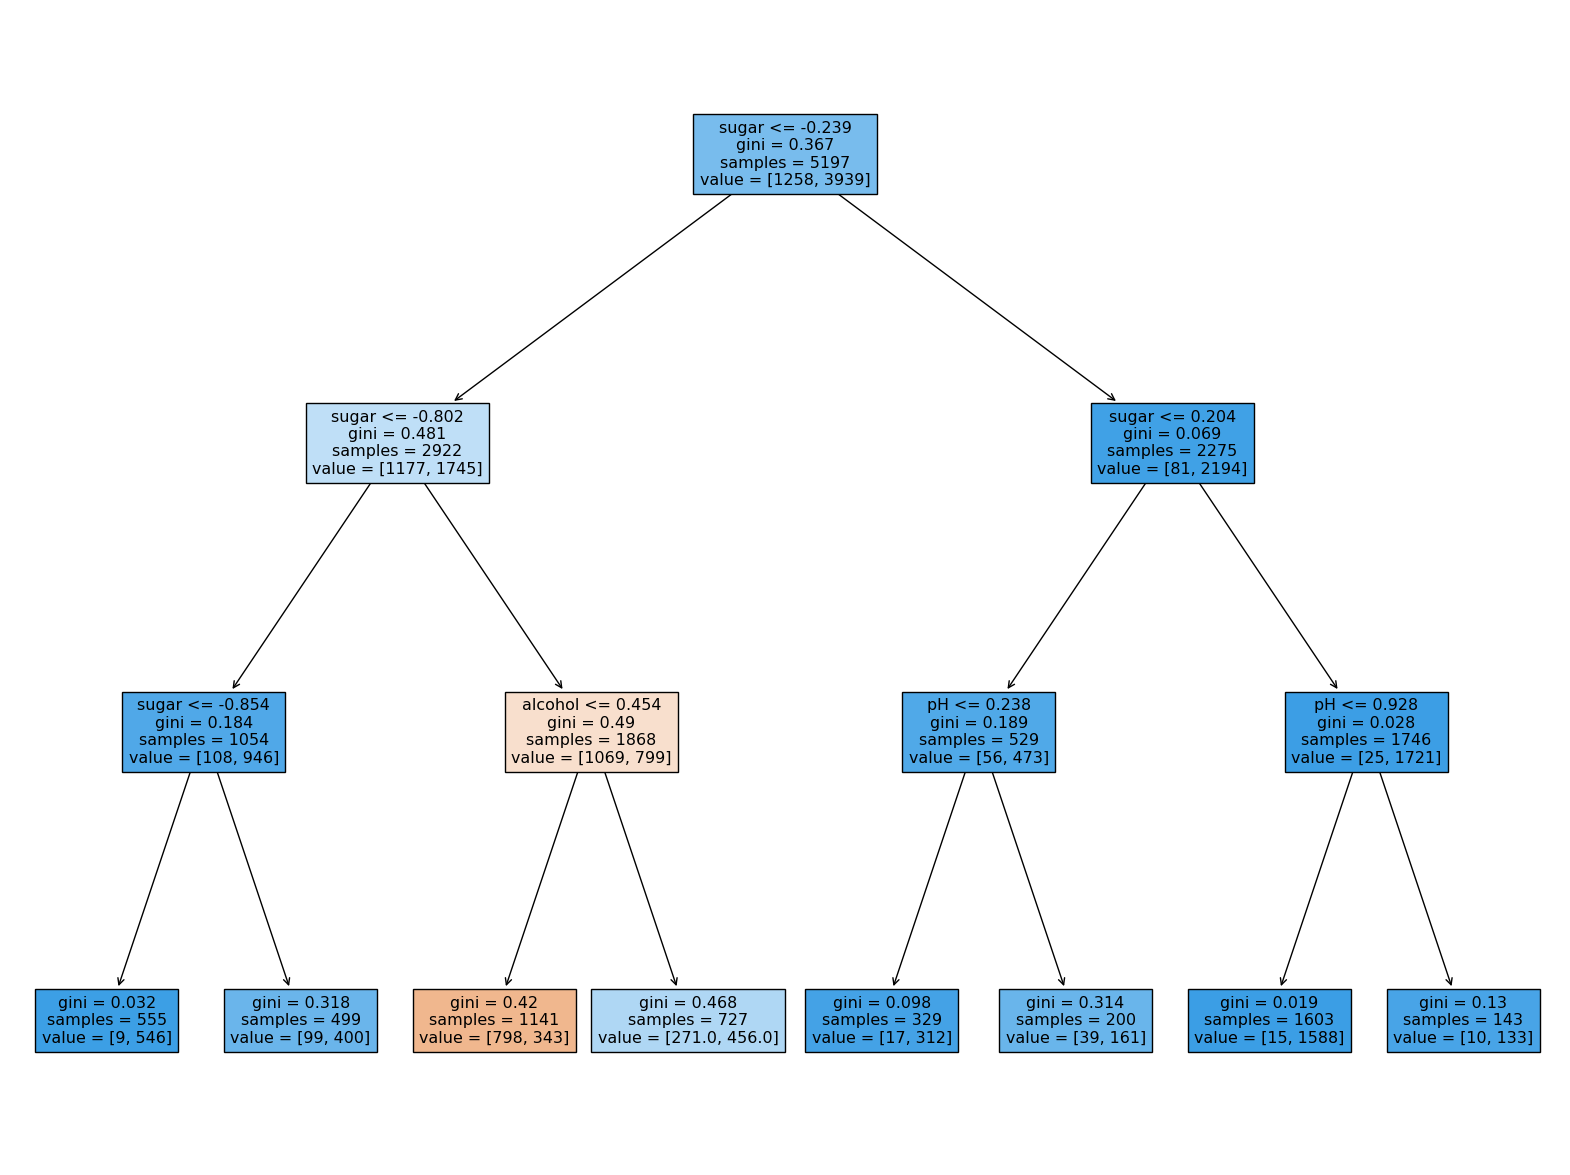

In [34]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

결정 트리는 표준화 전처리 과정이 필요없다. 아래처럼 정규화 하지 않았을 때랑 값이 동일하다.

In [35]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


전처리하지 않은 데이터로 결과 값을 보면 쉽게 이해할 수 있다.
- 당도가 1.625보닫 크고 4.325보다 작은 와인 중에 알고올 도수가 11.025와 같거나 작은 것이 레드와인이다.

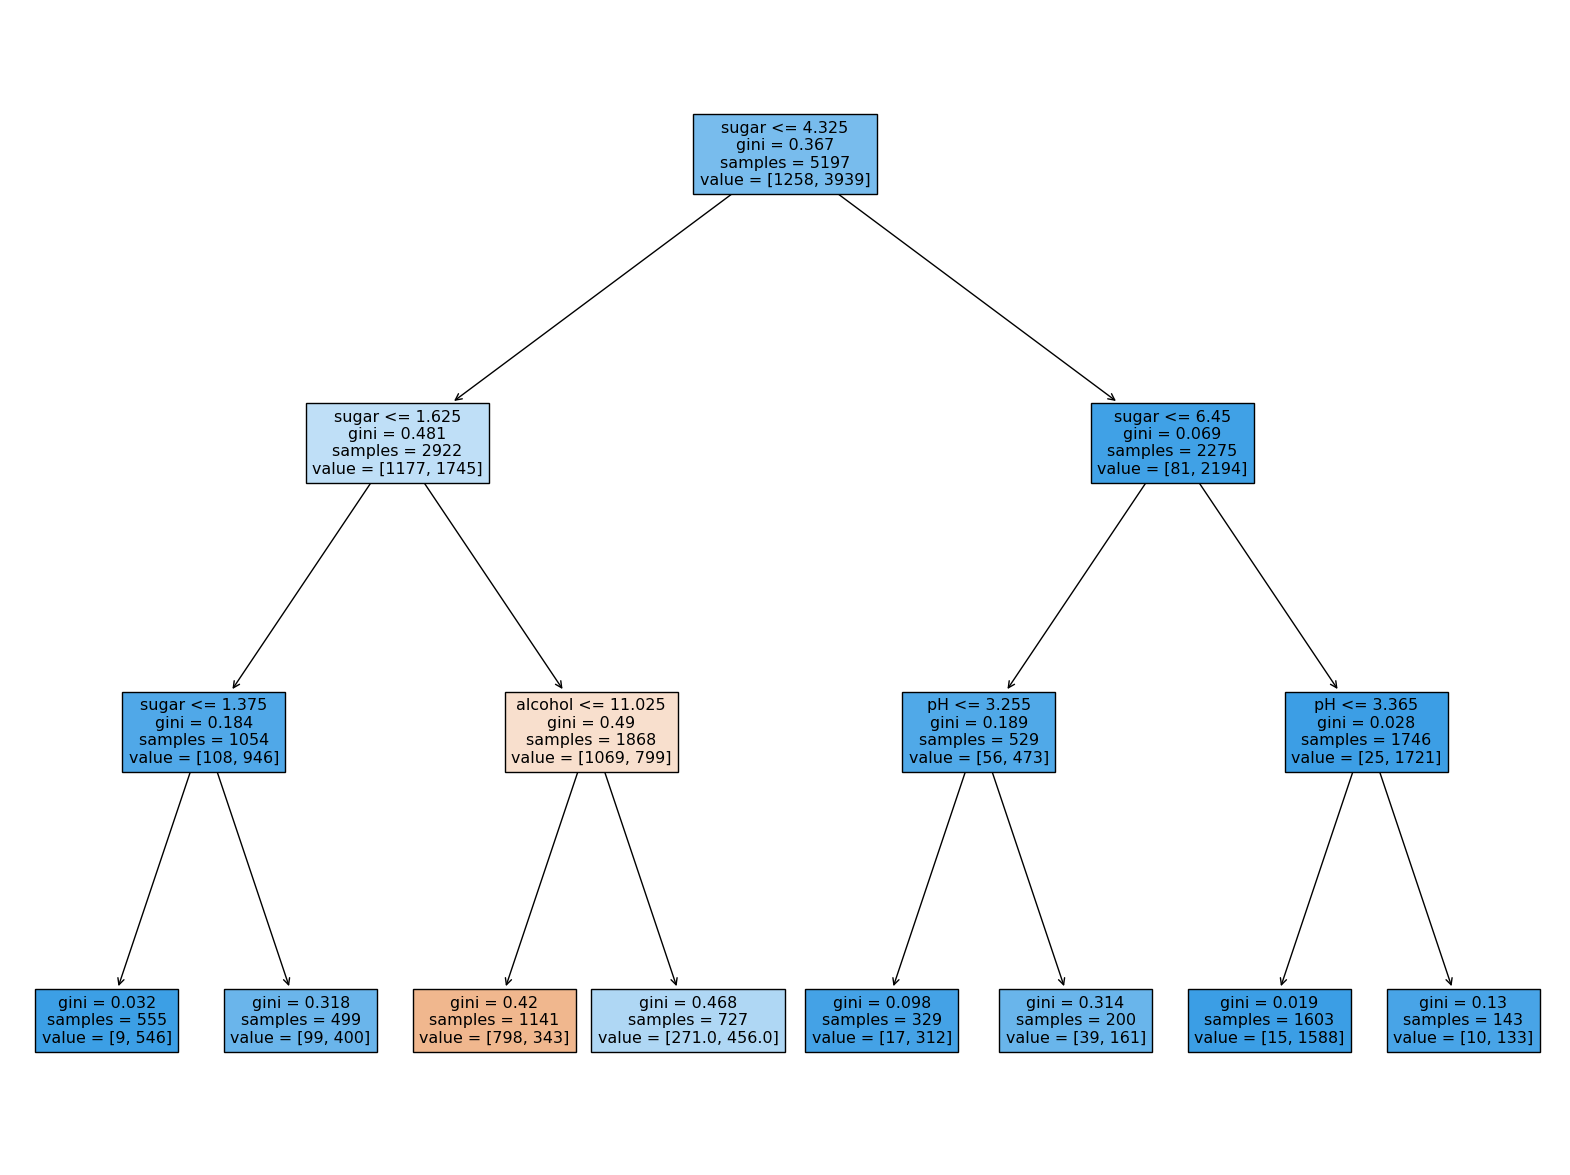

In [36]:
plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

특성 중요도 계산해보기
- 결과 값: 당도, 알코올 도수, pH 순서로 중요도가 높다.
    - 값을 모두 더하면 1이 된다.                                                                                                                                                                                                                                                                                       

In [37]:
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]
